<a href="https://colab.research.google.com/github/rahalbechir/knn-diabete-/blob/main/Pr%C3%A9diction_du_rendement_des_cultures_%C3%A0_l'aide_de_donn%C3%A9es_m%C3%A9t%C3%A9ologiques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('/content/yield_df.csv')

In [ ]:
data.head()
#hectrogramme est une unité standard utilisée pour évaluer la productivité agricole
#1000 hg = 1000 ×0.1=100 kg

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,28242.0,14120.500000,8152.907488,0.00,7060.2500,14120.50,21180.75,28241.00
Year,28242.0,2001.544296,7.051905,1990.00,1995.0000,2001.00,2008.00,2013.00
hg/ha_yield,28242.0,77053.332094,84956.612897,50.00,19919.2500,38295.00,104676.75,501412.00
average_rain_fall_mm_per_year,28242.0,1149.055980,709.812150,51.00,593.0000,1083.00,1668.00,3240.00
pesticides_tonnes,28242.0,37076.909344,59958.784665,0.04,1702.0000,17529.44,48687.88,367778.00
avg_temp,28242.0,20.542627,6.312051,1.30,16.7025,21.51,26.00,30.65


In [ ]:
data.isnull().sum()

,0
Unnamed: 0,0
Area,0
Item,0
Year,0
hg/ha_yield,0
average_rain_fall_mm_per_year,0
pesticides_tonnes,0
avg_temp,0


In [ ]:
data["Item"].value_counts()

,count
Item,
Potatoes,4276
Maize,4121
Wheat,3857
"Rice, paddy",3388
Soybeans,3223
Sorghum,3039
Sweet potatoes,2890
Cassava,2045
Yams,847


In [ ]:
data.groupby('Item').count()

,Unnamed: 0,Area,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
Item,,,,,,,
Cassava,2045,2045,2045,2045,2045,2045,2045
Maize,4121,4121,4121,4121,4121,4121,4121
Plantains and others,556,556,556,556,556,556,556
Potatoes,4276,4276,4276,4276,4276,4276,4276
"Rice, paddy",3388,3388,3388,3388,3388,3388,3388
Sorghum,3039,3039,3039,3039,3039,3039,3039
Soybeans,3223,3223,3223,3223,3223,3223,3223
Sweet potatoes,2890,2890,2890,2890,2890,2890,2890
Wheat,3857,3857,3857,3857,3857,3857,3857


In [ ]:
rendement_top10=data.groupby(['Area'],sort=True)['hg/ha_yield'].sum().nlargest(10)
print(rendement_top10)

Area
India             327420324
Brazil            167550306
Mexico            130788528
Japan             124470912
Australia         109111062
Pakistan           73897434
Indonesia          69193506
United Kingdom     55419990
Turkey             52263950
Spain              46773540
Name: hg/ha_yield, dtype: int64


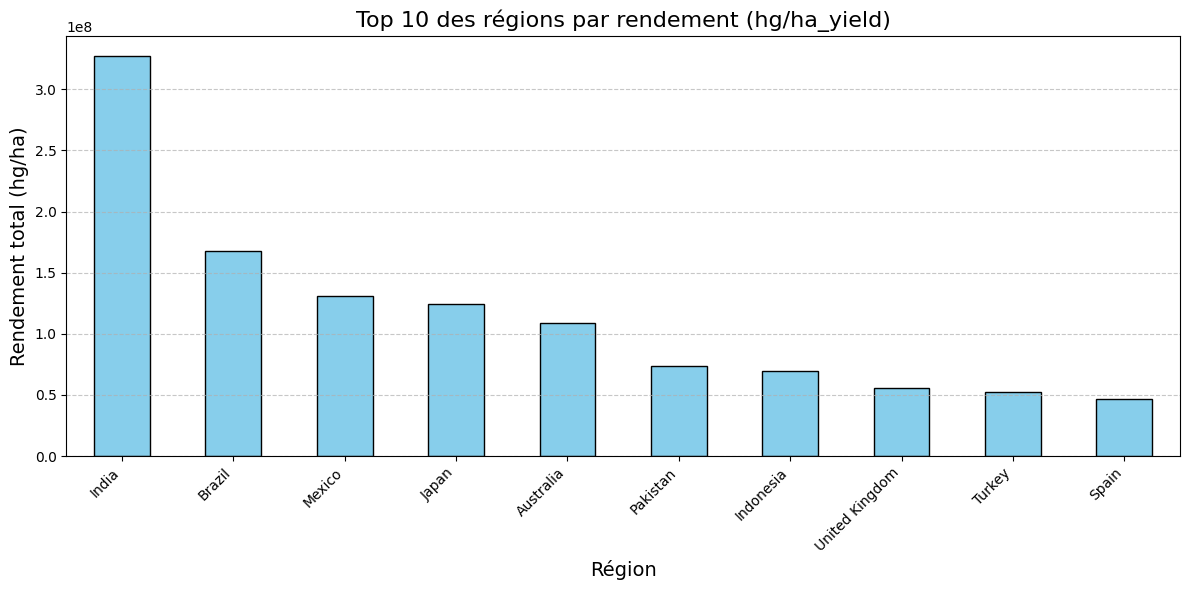

In [ ]:
# Visualisation avec un bar chart
plt.figure(figsize=(12, 6))
rendement_top10.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Top 10 des régions par rendement (hg/ha_yield)", fontsize=16)
plt.xlabel("Région", fontsize=14)
plt.ylabel("Rendement total (hg/ha)", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

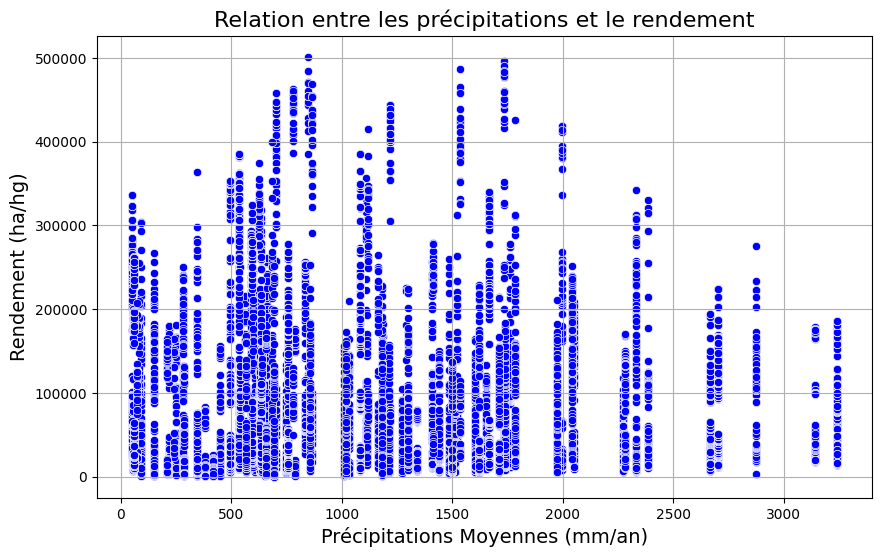

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x="average_rain_fall_mm_per_year", y="hg/ha_yield", color='blue')
plt.title('Relation entre les précipitations et le rendement', fontsize=16)
plt.xlabel('Précipitations Moyennes (mm/an)', fontsize=14)
plt.ylabel('Rendement (ha/hg)', fontsize=14)
plt.grid(True)
plt.show()

In [ ]:
print(data.columns)

Index(['Unnamed: 0', 'Area', 'Item', 'Year', 'hg/ha_yield',
       'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp'],
      dtype='object')


In [ ]:
geojson_url = "https://raw.githubusercontent.com/nvkelso/natural-earth-vector/master/geojson/ne_110m_admin_0_countries.geojson"
data2 = gpd.read_file(geojson_url)

In [ ]:
merged_data = data2.merge(data, left_on='NAME', right_on='Area', how='left')

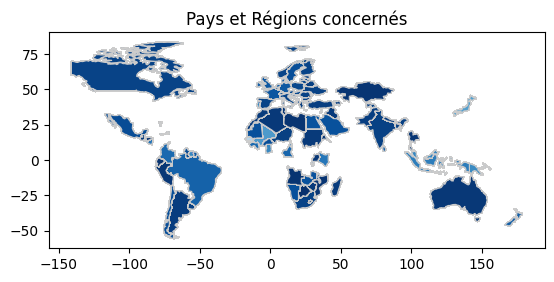

In [ ]:
merged_data.plot( column='hg/ha_yield', cmap='Blues_r', linewidth=0.8, edgecolor='0.8')
plt.title("Pays et Régions concernés")
plt.show()

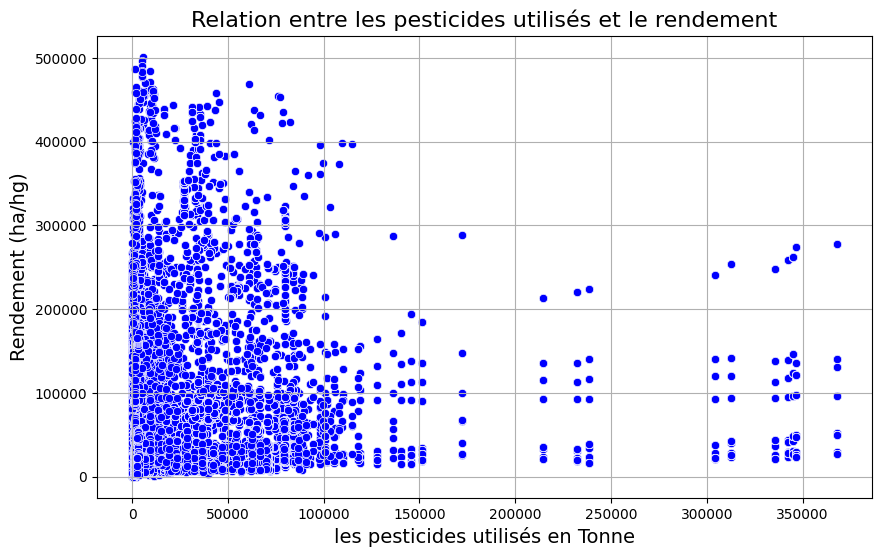

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x="pesticides_tonnes", y="hg/ha_yield", color='blue')
plt.title('Relation entre les pesticides utilisés et le rendement', fontsize=16)
plt.xlabel('les pesticides utilisés en Tonne', fontsize=14)
plt.ylabel('Rendement (ha/hg)', fontsize=14)
plt.grid(True)
plt.show()

In [ ]:
#grouped_data = data.groupby('Area')['hg/ha_yield'].mean().sort_values()

# Tracer le barchart
#plt.figure(figsize=(12, 8))
#grouped_data.plot(kind='bar', color='skyblue')
#plt.title('Moyenne du rendement (ha/hg) par pays', fontsize=16)
#plt.xlabel('Pays', fontsize=14)
#plt.ylabel('Rendement (ha/hg)', fontsize=14)
#plt.xticks(rotation=45, fontsize=12)
#plt.grid(axis='y', linestyle='--', alpha=0.7)
#plt.tight_layout()
#plt.show()


In [ ]:
#country_to_continent = {
    "Albania": "Europe",
    "Algeria": "Africa",
    "Angola": "Africa",
    "Argentina": "Amerique",
    "Armenia": "Europe",
    "Australia": "Océanie",
    "Austria ": "Europe",
    "Azerbaijan": "Asie",
    "Bahamas":"Asie",
    "Bahrain":"Asie",
    "Bangladesh":"Amerique",
    "Belgium":"Europe",
    "Bostwana":"Africa",
    "Brazil":"Amerique",
    "Bulgaria":"Europe",
    "Burkina faso":"Africa",
    "Burundi":"Africa",
    "Cameroon":"Africa",
    "Canada":"Amerique",
    "Central African Republic":"Africa",
    "Chile":"Amerique",
    "Colombia ":"Amerique",
    "Croatia":"Europe",
    "Denmark": "Europe",
    "Dominican Republic":"Amerique",
    "Ecuador":"Amerique",
    "Egypt":"Africa",
    "El Salvador":"Amerique",
    "Eritrea":"Africa",
    "Estonia": "Europe",
    "Finland ": "Europe",
    "France ":"Europe",
    "Germany": "Europe",
    "Ghana ":"Africa",
    "Greece": "Europe",
    "Guatemala":"Amerique",
    "Guinea ":"Africa",
    "Guyana ":"Amerique",
    "Haiti ":"Amerique",
    "Honduras":"Asie",
    "Indonesia ":"Asie",
    "Iraq":"Asie",
    "Ireland":"Europe",
    "Italy":"Europe",
    "Jamaica":"Amerique",
    "Japan ":"Asie",
    "Kazakhstan":"Asie",
    "Kenya":"Africa",
    "Latvia":"Europe",
    "Lebanon":"Asie",
    "Lesotho":"Africa",
    "Libya":"Africa",
    "Lithuania":"Europe",
    "Madagascar":"Africa",
    "Malawi ":"Africa",
    "Mali ":"Africa",
    "Mauritania ":"Africa",
    "Mauritius":"Africa",
    "Mexico":"Amerique",
    "Morocco":"Africa",
    "Mozambique":"Africa",
    "Namibia":"Africa",
    "Nepal":"Asie",
    "Netherlands":"Europe",
    "New Zealand":"Océanie",
    "Nicaragua":"Amerique",
    "Niger":"Africa",
    "Norway":"Europe",
    "Pakistan":"Asie",
    "Peru":"Amerique",
    "Poland ":"Europe",
    "Portugal":"Europe",
    "Qatar":"Asie",
    "Romania":"Europe",
    "Rwanda": "Africa",
    "Saudi Arabia": "Asie",
    "Senegal": "Africa",
    "Slovenia": "Europe",
    "South Africa": "Africa",
    "Spain": "Europe",
    "Sri Lanka": "Asie",
    "Sudan ": "Africa",
    "sweden ": "Europe",
    "switzerland": "Europe",
    "Tajikistan": "Asie",
    "Thailand": "Asie",
    "Tunisia": "Africa",
    "Turkey": "Europe",
    "Uganda": "Africa",
    "Ukraine": "Europe",
    "United kingdom": "Europe" ,
    "Uruguay": "Amerique",
    "Zambia ": "Africa",
    "Zimbabwe": "Africa",
}

In [ ]:
#data['Continent'] = data['Area'].map(country_to_continent)
data = data.drop('Continent', axis=1)


KeyError: "['Continent'] not found in axis"

In [ ]:
#grouped_data = data.groupby('Continent', as_index=False)['hg/ha_yield'].mean()

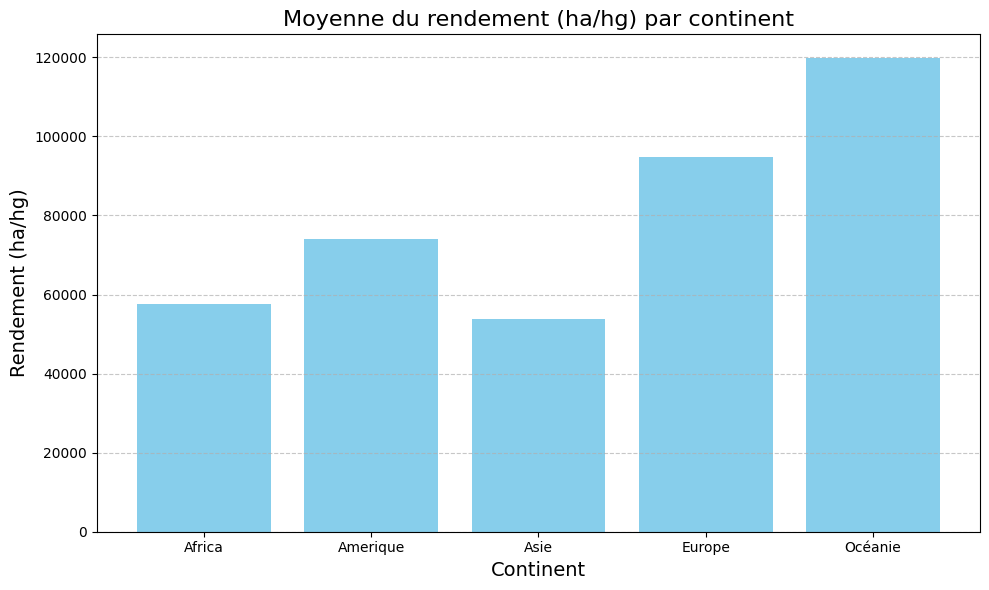

In [ ]:
#(plt.figure(figsize=(10, 6))
#plt.bar(grouped_data['Continent'], grouped_data['hg/ha_yield'], color='skyblue')
#plt.title('Moyenne du rendement (ha/hg) par continent', fontsize=16)
#plt.xlabel('Continent', fontsize=14)
#plt.ylabel('Rendement (ha/hg)', fontsize=14)
#plt.grid(axis='y', linestyle='--', alpha=0.7)
#plt.tight_layout()
#plt.show())

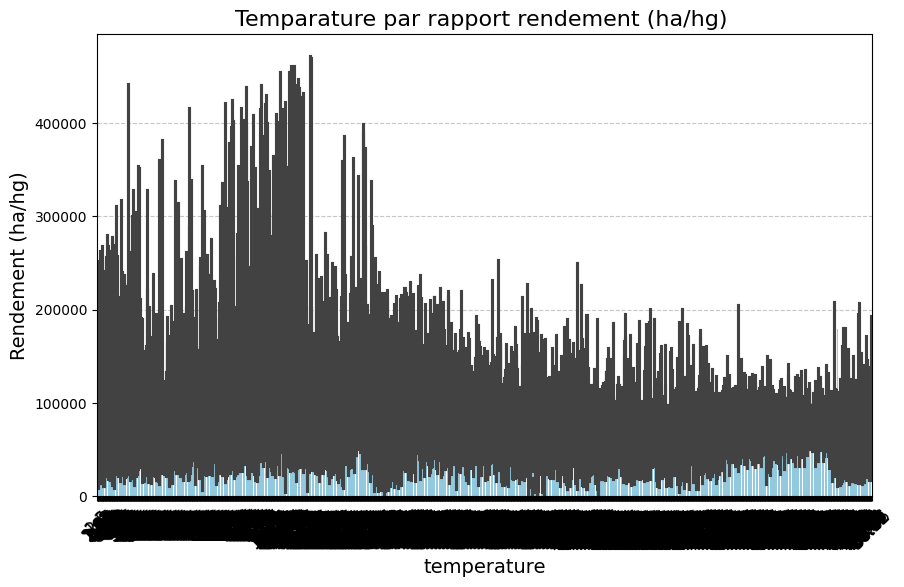

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=data, x="avg_temp", y="hg/ha_yield", color='skyblue')
plt.title('Temparature par rapport rendement (ha/hg) ', fontsize=16)
plt.xlabel('temperature', fontsize=14)
plt.ylabel('Rendement (ha/hg)', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45, fontsize=12)
plt.show()



In [ ]:
data["Item"].value_counts()
#most Item used

,count
Item,
Potatoes,4276
Maize,4121
Wheat,3857
"Rice, paddy",3388
Soybeans,3223
Sorghum,3039
Sweet potatoes,2890
Cassava,2045
Yams,847


In [ ]:
data.groupby(['Area'],sort=True)['hg/ha_yield'].sum().nlargest(10)

,hg/ha_yield
Area,
India,327420324
Brazil,167550306
Mexico,130788528
Japan,124470912
Australia,109111062
Pakistan,73897434
Indonesia,69193506
United Kingdom,55419990
Turkey,52263950


<ipython-input-11-5da71b6a2b5d>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  g=sns.distplot(data["hg/ha_yield"], kde=True, label='Data')


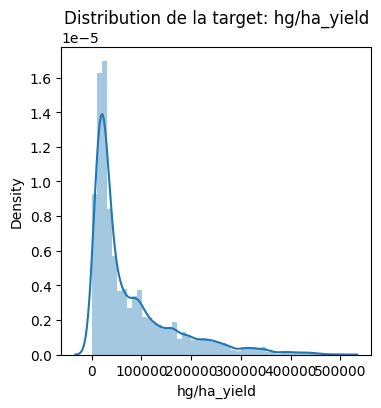

In [ ]:
plt.figure(figsize=(4, 4))
g=sns.distplot(data["hg/ha_yield"], kde=True, label='Data')
g.set_title("Distribution de la target: hg/ha_yield")

plt.show()

In [ ]:
#on a deux possibilites la 1 est de extraire les x et y (les collones pertienente) ou bien
#de faire l'encodage pour les autres colonnes si les autres sont importantes pour notre predictions
# Define features and target
#X = data[['average_rain_fall_mm_per_year','pesticides_tonnes', 'avg_temp']]
#y = data['hg/ha_yield']

In [ ]:
data_enc = pd.get_dummies(data, columns=["Area", "Item"], prefix=["Country", "Item"])

# Mise à jour de X et y
X = data_enc.drop(columns=['hg/ha_yield'])  # Toutes les colonnes sauf la target
y = data['hg/ha_yield']

In [ ]:
#X= X.drop(['Year'], axis=1)
#data_enc.head()
X.head()

,Unnamed: 0,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Country_Albania,Country_Algeria,Country_Angola,Country_Argentina,Country_Armenia,Country_Australia,...,Item_Cassava,Item_Maize,Item_Plantains and others,Item_Potatoes,"Item_Rice, paddy",Item_Sorghum,Item_Soybeans,Item_Sweet potatoes,Item_Wheat,Item_Yams
0,0,1485.0,121.0,16.37,True,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1,1,1485.0,121.0,16.37,True,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
2,2,1485.0,121.0,16.37,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,3,1485.0,121.0,16.37,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4,4,1485.0,121.0,16.37,True,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [ ]:
y.head()

,hg/ha_yield
0,36613
1,66667
2,23333
3,12500
4,7000


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X

array([[0.00000000e+00, 4.49670743e-01, 3.28894097e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.54095110e-05, 4.49670743e-01, 3.28894097e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [7.08190220e-05, 4.49670743e-01, 3.28894097e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [9.99929181e-01, 1.90028222e-01, 6.93361288e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [9.99964590e-01, 1.90028222e-01, 6.93361288e-03, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 1.90028222e-01, 6.93361288e-03, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00]])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2024)

In [ ]:
print("X_train:",x_train.shape)
print("X_test:",x_test.shape)
print("Y_train:",y_train.shape)
print("Y_test:",y_test.shape)

X_train: (22593, 115)
X_test: (5649, 115)
Y_train: (22593,)
Y_test: (5649,)


In [ ]:
model = LinearRegression()


In [ ]:
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
model.coef_

array([ 2.96781194e+05,  3.79556567e+13,  1.75749243e+04,  8.16760639e+03,
       -5.98524174e+15, -5.96862647e+15, -5.97958826e+15, -5.97460130e+15,
       -5.97425614e+15, -5.97392289e+15, -5.98077847e+15, -5.97288741e+15,
       -5.98294464e+15, -5.96855506e+15, -5.99929807e+15, -5.97492266e+15,
       -5.97764823e+15, -5.97251844e+15, -5.98852671e+15, -5.97480364e+15,
       -5.97646993e+15, -5.98273041e+15, -5.98665809e+15, -5.97395859e+15,
       -5.98353975e+15, -5.98568212e+15, -6.00612985e+15, -5.98081418e+15,
       -5.97593433e+15, -5.98434909e+15, -5.99463246e+15, -5.96817419e+15,
       -5.98880046e+15, -5.97212568e+15, -5.97501788e+15, -5.97394669e+15,
       -5.97788627e+15, -5.97589863e+15, -5.98169493e+15, -5.97532733e+15,
       -5.99132369e+15, -5.98721748e+15, -5.99597740e+15, -5.98470615e+15,
       -5.99108565e+15, -5.97457750e+15, -5.98045712e+15, -5.99972654e+15,
       -5.97013803e+15, -5.98087369e+15, -5.97746970e+15, -5.99197831e+15,
       -5.98741982e+15, -

In [ ]:
model.intercept_

1.4269198409318412e+16

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
#let's calculate the metrics
# MSE
mse = mean_squared_error(y_test, y_pred)
print("MSE --> ", mse)

MSE -->  1884371154.5066383


In [ ]:
# RMSE
import math
rmse = math.sqrt(mse)
print("RMSE --> ", rmse)

RMSE -->  43409.34409210347


In [ ]:
# MAE
mae = mean_absolute_error(y_test, y_pred)
print("MAE --> ", mae)

MAE -->  29968.47973092583


In [ ]:
# R2
r2 = r2_score(y_test, y_pred)
print("R2 --> ", r2)

R2 -->  0.7439151699720743


In [ ]:
#afficher tous ensemble pour mieux analyser
print("MSE --> ", mse)
print("RMSE --> ", rmse)
print("MAE --> ", mae)
print("R2 --> ", r2)

MSE -->  1884371154.5066383
RMSE -->  43409.34409210347
MAE -->  29968.47973092583
R2 -->  0.7439151699720743


In [ ]:
# Exemple de nouvelles données (assurez-vous qu'elles ont les mêmes colonnes)
new_data =pd.DataFrame({
    'average_rain_fall_mm_per_year': [860],  # exemple de nouvelle valeur
    'pesticides_tonnes': [101],  # exemple de nouvelle valeur
    'avg_temp': [28],  # exemple de nouvelle valeur
    'Area': ['Tunisia'],  # exemple de nouvelle catégorie
    'Item': ['potatoes']  # exemple de nouvelle catégorie
})
# Encodage des colonnes catégoriques dans les nouvelles données
new_data_enc = pd.get_dummies(new_data, columns=["Area", "Item"], prefix=["Country", "Item"])

# Obtenez les colonnes de X utilisées pour l'entraînement (sans 'hg/ha_yield' et 'Unnamed: 0')
X_columns = data_enc.drop(columns=['hg/ha_yield', 'Unnamed: 0']).columns

# Assurez-vous que les nouvelles données encodées ont les mêmes colonnes que X
new_data_enc = new_data_enc.reindex(columns=X_columns, fill_value=0)

# Prédictions avec le modèle
new_predictions = model.predict(new_data_enc)

print("Prédictions pour les nouvelles données : ", new_predictions)


Prédictions pour les nouvelles données :  [4.09410322e+16]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [ ]:

print("Prédictions pour les nouvelles données (Hg/Ha) :", new_predictions_hectogram)

Prédictions pour les nouvelles données (Hg/Ha) : [4.09410322e+14]
